#Problem 1

In [110]:
# Installing Networkx library
#!pip install networkx --upgrade

In [111]:
# Installing Scipy libraries
!pip install scipy==1.8.0 
!pip install networkx

# Importing all the required modules
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

# pyright: reportUndefinedVariable=false

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Download and read the dataset**

In [112]:
from google.colab import files
uploaded = files.upload()

Saving Keyword_data - Keyword_data.csv to Keyword_data - Keyword_data (1).csv


In [113]:
# Reading the dataset
df_keyword = pd.read_csv('Keyword_data - Keyword_data.csv')

In [114]:
# drop rows that does not have keyword data
df_keyword= df_keyword.dropna(subset=['Keyword 1'], how='any', axis=0)

In [115]:
# extract keyword data from the above ﬁle
# assign numbers to the keywords

# change keywords into lowercase
for i in range(1,13):
  df_keyword[f'Keyword {i}'] = df_keyword[f'Keyword {i}'].str.lower()

In [116]:
df_keyword.reset_index(drop=True, inplace=True)
del df_keyword['Title']
# Displaying the dataframe after performing data pre-processing
df_keyword.head()

,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,equity,organizational sociology,performance,meta-analysis,psychometrics,organizational research,financial performance,agency theory,organizational effectiveness,organizational behavior,corporate governance,NaN
1,diversification in industry,business planning,performance standards,employees -- rating of,corporate culture,strategic planning,organizational effectiveness,management science,management research,product management,NaN,NaN
2,interorganizational relations,intergroup relations,business communication,investments,supply chains,knowledge management,interorganizational networks,corporate governance,group decision making,intellectual capital,NaN,NaN
3,executive compensation,wages,human capital,labor economics,personnel management,management science,contingency theory (management),compensation management,executive ability (management),corporate governance,NaN,NaN
4,knowledge management,information resources management,management information systems,break-even analysis,data mining,management science,research & development,research & development contracts,corporate governance,decision making,organizational behavior,transaction costs


**Write a Python code to extract keyword data from the above file and convert it to a weighted adjacency matrix.**

In [117]:
# Preparing words column
column_list = df_keyword.columns.tolist()
df_list = [df_keyword[i] for i in column_list]
df_words_column = pd.concat(df_list, ignore_index=True)
df_words_column = list(df_words_column.dropna().unique())

In [118]:
# Preparing the weighted adjacency matrix
df = np.zeros([len(df_words_column),len(df_words_column)])
df_array = pd.DataFrame(data = df, index=df_words_column, columns=df_words_column)

In [119]:
# Converting first low elements into a list
df_keyword.loc[1, :].dropna().values.tolist()

['diversification in industry',
 'business planning',
 'performance standards',
 'employees -- rating of',
 'corporate culture',
 'strategic planning',
 'organizational effectiveness',
 'management science',
 'management research',
 'product management']

In [120]:
# Filling the weighted adjacency matrix
for i in range(0,len(df_keyword)):
  row = df_keyword.loc[i, :].dropna().values.tolist()
  for a in range(0,len(row)-1):
    for b in range(a+1, len(row)):
      df_array[row[a]][row[b]]+=1
      df_array[row[b]][row[a]]+=1

In [121]:
# Displaying the weighted adjacency matrix
df_array

,equity,diversification in industry,interorganizational relations,executive compensation,knowledge management,emotions (psychology),supervisors,industrial relations,decision making,corporate governance,...,problem employees,strategic business units,subsidiary corporations -- management,financial management,customer orientation,transaction costs,innovation adoption,work attitudes,host countries (business),marketing strategy
equity,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
diversification in industry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
interorganizational relations,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
executive compensation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
knowledge management,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
transaction costs,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
innovation adoption,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
work attitudes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
host countries (business),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
#download csv file
from google.colab import files

df_array.to_csv('df_array.csv', encoding = 'utf-8') 
files.download('df_array.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [123]:
# Installing Scikit-Fuzzy Library
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Read the adjacency matrix and convert it into a weighted network**

In [124]:
# Converting adjacency matrix to weighted network
from networkx.algorithms.shortest_paths import weighted

G = nx.Graph()
group_list=[]
for a in range(0,len(df_words_column)-1):
  for b in range(a+1, len(df_words_column)):
    if df_array[df_words_column[a]][df_words_column[b]]==0:
      pass
    else:
      group_list.append((df_words_column[a], df_words_column[b], df_array[df_words_column[a]][df_words_column[b]]))

G.add_weighted_edges_from(group_list)
print(G)

Graph with 248 nodes and 2141 edges


**Compute node degree and strength**

In [125]:
# Compute node degree and strength
degree_ = G.degree()
strength_= G.degree(weight='weight')

In [126]:
print(degree_)

[('equity', 10), ('corporate governance', 62), ('organizational behavior', 166), ('organizational sociology', 66), ('performance', 23), ('meta-analysis', 10), ('agency theory', 38), ('organizational effectiveness', 104), ('psychometrics', 10), ('organizational research', 24), ('financial performance', 19), ('diversification in industry', 18), ('institutional investors', 20), ('management science', 102), ('product management', 24), ('business planning', 29), ('performance standards', 9), ('strategic planning', 66), ('employees -- rating of', 9), ('globalization', 11), ('corporate culture', 9), ('boards of directors', 21), ('international business enterprises', 11), ('foreign investments', 11), ('pension trusts', 11), ('management research', 17), ('high technology', 11), ('technological innovations', 11), ('innovation adoption', 11), ('interorganizational relations', 24), ('knowledge management', 19), ('personnel management', 93), ('teams in the workplace', 55), ('intergroup relations', 

In [127]:
print(strength_)

[('equity', 10.0), ('corporate governance', 85.0), ('organizational behavior', 265.0), ('organizational sociology', 96.0), ('performance', 29.0), ('meta-analysis', 10.0), ('agency theory', 48.0), ('organizational effectiveness', 144.0), ('psychometrics', 10.0), ('organizational research', 28.0), ('financial performance', 21.0), ('diversification in industry', 20.0), ('institutional investors', 20.0), ('management science', 136.0), ('product management', 28.0), ('business planning', 31.0), ('performance standards', 9.0), ('strategic planning', 80.0), ('employees -- rating of', 9.0), ('globalization', 11.0), ('corporate culture', 9.0), ('boards of directors', 21.0), ('international business enterprises', 11.0), ('foreign investments', 11.0), ('pension trusts', 11.0), ('management research', 19.0), ('high technology', 11.0), ('technological innovations', 11.0), ('innovation adoption', 11.0), ('interorganizational relations', 27.0), ('knowledge management', 20.0), ('personnel management', 

**Show the top 10 nodes by degree and top 10 nodes by strength**

In [128]:
# Storing top 10 nodes
degree_sorted_10 = sorted(degree_, key=lambda x: x[1], reverse=True)[:10]
strength_sorted_10 = sorted(strength_, key=lambda x: x[1], reverse=True)[:10]

In [129]:
# Top 10 nodes by degree
top_10_nodes_by_degrees = pd.DataFrame(degree_sorted_10, columns=['Nodes', 'Degree'])
top_10_nodes_by_degrees

,Nodes,Degree
0,organizational behavior,166
1,organizational effectiveness,104
2,management science,102
3,personnel management,93
4,decision making,90
5,organizational structure,74
6,organizational sociology,66
7,strategic planning,66
8,industrial management,64
9,corporate governance,62


In [130]:
# Top 10 nodes by strength
top_10_nodes_by_strength = pd.DataFrame(strength_sorted_10, columns=['Nodes', 'Strength'])
top_10_nodes_by_strength

,Nodes,Strength
0,organizational behavior,265.0
1,organizational effectiveness,144.0
2,management science,136.0
3,personnel management,126.0
4,decision making,112.0
5,organizational structure,107.0
6,organizational sociology,96.0
7,corporate governance,85.0
8,industrial management,84.0
9,strategic planning,80.0


**Show the top 10 node pairs by weight**

In [131]:
# Top 10 Node Pairs based on weights
node_pairs=pd.DataFrame(sorted(G.edges(data=True),key=lambda x: x[2]['weight'], reverse=True), columns=['Node 1', 'Node 2', 'Weight'])[:10]
node_pairs

,Node 1,Node 2,Weight
0,organizational behavior,organizational effectiveness,{'weight': 11.0}
1,organizational behavior,organizational structure,{'weight': 9.0}
2,organizational behavior,personnel management,{'weight': 8.0}
3,organizational behavior,management science,{'weight': 7.0}
4,corporate governance,organizational behavior,{'weight': 6.0}
5,organizational behavior,decision making,{'weight': 6.0}
6,organizational behavior,organizational sociology,{'weight': 6.0}
7,organizational effectiveness,organizational structure,{'weight': 6.0}
8,organizational behavior,industrial relations,{'weight': 5.0}
9,organizational behavior,organizational change,{'weight': 5.0}


**Plot average strength on y-axis and degree on x-axis**

In [132]:
# Preparing the final dataframe
degree_sorted = sorted(degree_, key=lambda x: x[1], reverse=True)
strength_sorted = sorted(strength_, key=lambda x: x[1], reverse=True)
final_degree_df = pd.DataFrame(degree_sorted, columns=['Nodes', 'Degree'])
final_strength_df = pd.DataFrame(strength_sorted, columns=['Nodes', 'Strength'])

In [133]:
# Preparing the final dataframe
final_data_frame = pd.DataFrame()
final_data_frame['Nodes'] = final_degree_df['Nodes']
final_data_frame['Degree'] = final_degree_df['Degree']
final_data_frame['Strength'] = final_strength_df['Strength']

In [134]:
# Displaying the final dataframe
final_data_frame.head(10)

,Nodes,Degree,Strength
0,organizational behavior,166,265.0
1,organizational effectiveness,104,144.0
2,management science,102,136.0
3,personnel management,93,126.0
4,decision making,90,112.0
5,organizational structure,74,107.0
6,organizational sociology,66,96.0
7,strategic planning,66,85.0
8,industrial management,64,84.0
9,corporate governance,62,80.0


Text(0, 0.5, 'Average Strength')

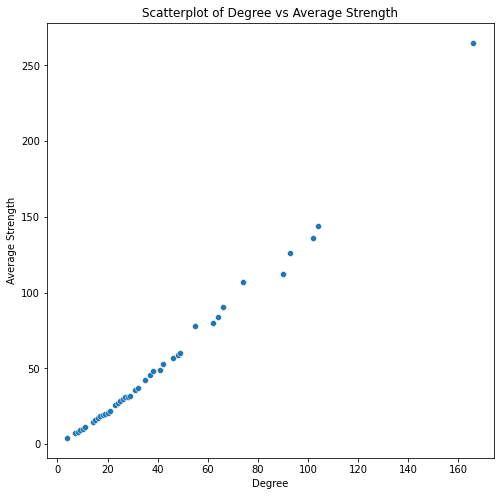

In [135]:
# Degree vs Average Strength

# Performing Group By Degree and finding average values
plot_df=final_data_frame.groupby('Degree').mean()

# Import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.scatterplot(data=plot_df,x=plot_df.index,y='Strength')
plt.title('Scatterplot of Degree vs Average Strength')
plt.xlabel('Degree')
plt.ylabel('Average Strength')